In [1]:
!pip install openai

In [2]:
import time
import openai

In [3]:
api_key = ''
with open('chat_gpt_api_key.txt') as f:
    lines = f.read()
    api_key = lines

In [4]:
print(api_key)

sk-proj-RHFI3evEqRnNJPS43Z6OT3BlbkFJALsIkfCweIeMGayIcJmX


In [5]:
from openai import OpenAI
client = OpenAI(api_key=api_key)

In [6]:
def chat(inp, role='user', temp=0.0, top_p=1.0):
    '''
    Call ChatGPT API
    '''
    message = [{'role': role, 'content': inp}]
    while True:
        try:
            completion = client.chat.completions.create(
                # model='gpt-4o',
                model='gpt-3.5-turbo',
                messages=message,
                temperature=temp,
                top_p=top_p
            )
            reply_content = completion.choices[0].message.content
            return reply_content
        except:
        #   print("Exception")
          time.sleep(2)
          continue

In [7]:
print(chat("tell me a story containing atmost 100 characters"))

Lost in the woods, she stumbled upon a hidden cabin. Inside, she found a map that led her back home.


In [8]:
from datetime import datetime
import pandas as pd

C:\Users\kisho\AppData\Local\Temp\ipykernel_33540\1822851962.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
def prompt_zero_shot(sentence1, sentence2):
    prompt = "Classify if the relationship between two statements is divergent or not:\nStatement 1: {}\nStatement 2: {}\nYour final answer should only contain the word 'Divergent' or 'Not Divergent'".format(sentence1, sentence2)
    return prompt

def prompt_few_shot(sentence1, sentence2):
    prompt = "Classify if the relationship between the last two statements is divergent or not.\nStatement 1: Research suggests that glyphosate-based herbicides could be linked to birth defects, cancer, kidney disease, and non-alcoholic fatty liver disease.\nStatement 2: In the cited study regarding birth defects, the authors state that the results are preliminary and must be confirmed through additional research.\nRelationship: Divergent\nStatement 1: Pollen can travel large distances and overcome obstacles such as barrier crops, meaning it easily and indiscriminately spreads genes between conventional crops and genetically modified crops. Thus, the process of natural pollination has the potential to eventually render entire species 'genetically modified'.\nStatement 2: Crops could be altered so that the pollen produced by the plant doesn't contain the modified gene (p. 268).\nRelationship: Not Divergent\nStatement 1: Community water fluoridation has been a proven method to improve health for over 70 years.\nStatement 2: Excess amounts of fluoride ions in drinking water has negative health effects.\nRelationship: Divergent\nStatement 1: It is much more effective to use human parts that a person has consented to donate.\nStatement 2: It is not possible to cultivate some diseases in a manner which allows for experiments to be conducted without using living organisms (p. 55).\nRelationship: Divergent\nStatement 1: All fluoride products used in the USA are certified by NSF standard 60 for use in public water supplies.\nStatement 2: Fluoride is an industrial byproduct.\nRelationship: Not Divergent\nStatement 1: Because children have neither the capability nor experience to adequately speak for themselves, the government assumes the mantle to advocate for their interests.\nStatement 2: Parents usually have the legal and moral authority to act as surrogates for their children.\nRelationship: Not Divergent\nStatement 1: Compared to the flu, the death rate for Covid-19 patients was very high.\nStatement 2: Higher mortality of Covid-19 could be due to medical constraints created by the sudden influx of patients over a short period of time.\nRelationship: Not Divergent\nStatement 1: As the link observes, the cervical cancer vaccine targets the two types of HPV responsible for 70% of cervical cancers and precancerous lesions. It is precisely that 'small' set of infections that the vaccine targets.\nStatement 2: Only a small proportion of infections with certain types of HPV can persist and progress to cancer. Hence mandatory vaccination appears to be an excessive measure.\nRelationship: Divergent\nStatement 1: In Austria it is legal to smoke in bars and restaurants.\nStatement 2: Not for much longer. It's been an ongoing dispute for several years, which now seems to settle towards prohibition.\nRelationship: Not Divergent\nStatement 1: {}\nStatement 2: {}\nYour final answer should only contain the word 'Divergent' or 'Not Divergent'".format(sentence1, sentence2)
    return prompt

def prompt_cot(sentence1, sentence2):
    prompt = "You are given a task to find if the given pair of statements are divergent or not. For example, the statement 'Community water fluoridation has been a proven method to improve health for over 70 years.' and 'Excess amounts of fluoride ions in drinking water has negative health effects.' are a pair of divergent statements because the former establishes water fluoridation as a safe method to improve public health whereas the latter discourages the use of flourination as excess flouride ions have detrimental health effects. Here is another example: the statements 'Compared to the flu, the death rate for Covid-19 patients was very high.' and 'Higher mortality of Covid-19 could be due to medical constraints created by the sudden influx of patients over a short period of time.' are not a divergent pair of statements because the former compares the mortality of Covid-19 to the flu whereas the latter discusses the possible reasons for the high mortality rate due to Covid-19 virus. Let's work this out with the statements provided below in a step by step way to be sure we have the right answer. The first statement is the value for the key 'Statement 1:' and the second statement is the value for the key 'Statement 2:' in the dictionary.\nStatement 1: {}\nStatement 2: {}\nYour final answer should only contain the word 'Divergent' or 'Not Divergent'".format(sentence1, sentence2)
    return prompt


In [10]:
df = pd.read_csv('./test_data.csv')
df.head()

,text1,text2,Divergent or Not Divergent,FS response
0,The state should abide by the precautionary pr...,Genetically modified crops can only be grown i...,Divergent,NaN
1,While many agricultural practices may be seen ...,Many of the processes employed in genetic modi...,Divergent,NaN
2,Genetically modified crops can be harmful to t...,"Intensive agriculture as a whole, not specific...",Divergent,NaN
3,Genetically modified crops can be harmful to t...,Genetic modification can be used to prevent ce...,Divergent,NaN
4,Genetically modified crops can be harmful to t...,GM crops are often modified in ways that can m...,Divergent,NaN


In [11]:
prompt_few_shot(df.iloc[0]["text1"], df.iloc[0]["text2"])

"Classify if the relationship between the last two statements is divergent or not.\nStatement 1: Research suggests that glyphosate-based herbicides could be linked to birth defects, cancer, kidney disease, and non-alcoholic fatty liver disease.\nStatement 2: In the cited study regarding birth defects, the authors state that the results are preliminary and must be confirmed through additional research.\nRelationship: Divergent\nStatement 1: Pollen can travel large distances and overcome obstacles such as barrier crops, meaning it easily and indiscriminately spreads genes between conventional crops and genetically modified crops. Thus, the process of natural pollination has the potential to eventually render entire species 'genetically modified'.\nStatement 2: Crops could be altered so that the pollen produced by the plant doesn't contain the modified gene (p. 268).\nRelationship: Not Divergent\nStatement 1: Community water fluoridation has been a proven method to improve health for over

In [12]:
# Process test with gpt-4o zs prompt
for i in range(len(df)):
    print(i)
    row = df.iloc[i]
    sentence1 = row["text1"]
    sentence2 = row["text2"]
    ground_label = row["Divergent or Not Divergent"]
    chat_gpt_fs = chat(prompt_few_shot(sentence1, sentence2))

    df.loc[i] = [sentence1, sentence2, ground_label, chat_gpt_fs]

print("Done")





0


C:\Users\kisho\AppData\Local\Temp\ipykernel_33540\4188408275.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Divergent' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[i] = [sentence1, sentence2, ground_label, chat_gpt_fs]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
Done


In [13]:
df.head()

,text1,text2,Divergent or Not Divergent,FS response
0,The state should abide by the precautionary pr...,Genetically modified crops can only be grown i...,Divergent,Not Divergent
1,While many agricultural practices may be seen ...,Many of the processes employed in genetic modi...,Divergent,Divergent
2,Genetically modified crops can be harmful to t...,"Intensive agriculture as a whole, not specific...",Divergent,Not Divergent
3,Genetically modified crops can be harmful to t...,Genetic modification can be used to prevent ce...,Divergent,Divergent
4,Genetically modified crops can be harmful to t...,GM crops are often modified in ways that can m...,Divergent,Divergent


In [15]:
final_value = [""]*len(df)
for i in range(len(df)):
  temp = df.iloc[i]['FS response']
  if "Not Divergent" in temp:
    final_value[i] = "Not Divergent"
  elif "Divergent" in temp:
    final_value[i] = "Divergent"

In [17]:
print(final_value)

['Not Divergent', 'Divergent', 'Not Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Not Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Not Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Divergent', 'Diverge

In [18]:
df['final_val'] = final_value

In [19]:
csv_data = df.to_csv("./test_data with gpt35 fs response.csv", index = False)
csv_data = df.to_csv("./test_data with gpt35 fs response backup.csv", index = False)


In [2]:
import pandas as pd
df = pd.read_csv('./test_data with gpt35 fs response.csv')

In [3]:
from sklearn.metrics import classification_report
print(classification_report(list(df['Divergent or Not Divergent']), list(df['final_val'])))

               precision    recall  f1-score   support

    Divergent       0.58      0.98      0.73       138
Not Divergent       0.62      0.05      0.09       104

     accuracy                           0.58       242
    macro avg       0.60      0.51      0.41       242
 weighted avg       0.60      0.58      0.45       242



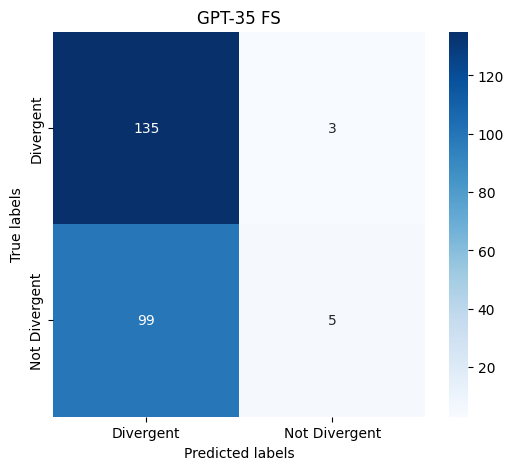

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_test = df['Divergent or Not Divergent']
y_pred = df['final_val']
cm = confusion_matrix(y_test, y_pred, labels=['Divergent', 'Not Divergent'])

plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
                 xticklabels=['Divergent', 'Not Divergent'], yticklabels=['Divergent', 'Not Divergent'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.title('GPT-35 FS')
plt.show()